In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/creditcard.csv')

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].unique()

array([0, 1])

In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [90]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
df=df.dropna()

In [51]:
dfsubset = pd.concat([df[df.Class == 0].sample(500), df[df.Class == 1]])

In [89]:
dfsubset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68259,52902.0,-1.207730,0.016350,1.827195,-0.405860,1.327054,-1.299534,0.399513,-0.119515,-0.607363,...,-0.132392,-0.609054,0.010742,0.275611,-0.092236,-0.113304,-0.167744,-0.106873,1.98,0
77005,56840.0,-0.388905,1.066373,1.259752,0.015582,0.194932,-0.512517,0.635074,0.071933,-0.379807,...,-0.236039,-0.585835,0.022768,0.018837,-0.236841,0.101927,0.260304,0.094795,5.99,0
165703,117603.0,-0.253250,0.648952,1.041476,-0.543685,-0.312967,-0.241998,-0.111379,-0.782279,0.722861,...,1.003688,0.544753,-0.007575,-0.074681,-0.512534,0.494776,-0.043993,0.050381,5.69,0
126150,77946.0,1.267021,-1.099455,1.626969,-0.016711,-2.021994,0.233406,-1.470199,0.232754,0.779277,...,-0.548989,-0.631539,0.074144,0.456982,0.142921,1.074341,0.025556,0.021348,10.00,0
191339,129214.0,-1.953789,2.378286,-2.068338,-1.527696,0.430029,-1.194917,0.814797,0.595431,0.631658,...,0.130633,0.689739,-0.047072,0.665608,-0.089927,0.049320,0.587906,0.274536,1.46,0


In [52]:
X=dfsubset.drop(['Time','Class'],axis=1)
y=dfsubset['Class']

#SCALING THE DATA

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_scal = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.3)

#LINEAR KERNEL SVM

In [71]:
from sklearn.svm import SVC
model=SVC(kernel='linear')

In [72]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [73]:
model.score(X_test,y_test)

0.9362416107382551

In [74]:
from matplotlib import pyplot as plt
%matplotlib inline

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

Text(0.5, 1.0, 'SVM-Linear Kernel)')

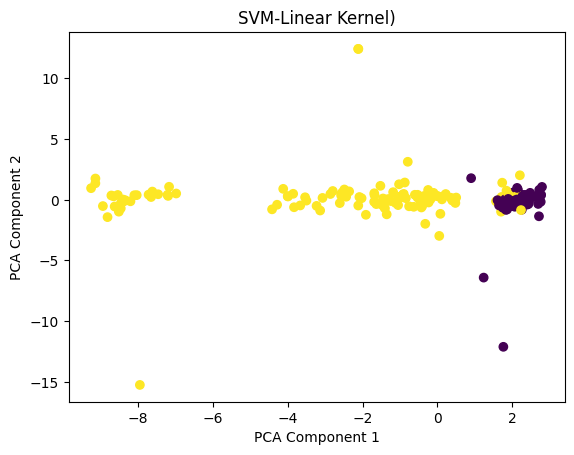

In [79]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.predict(X_test))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM-Linear Kernel)")


#RBF KERNEL SVM

In [80]:
model1=SVC(kernel='rbf')

In [81]:
model1.fit(X_train,y_train)

SVC()

In [82]:
model1.score(X_test,y_test)

0.9328859060402684

Text(0.5, 1.0, 'SVM-RBF Kernel)')

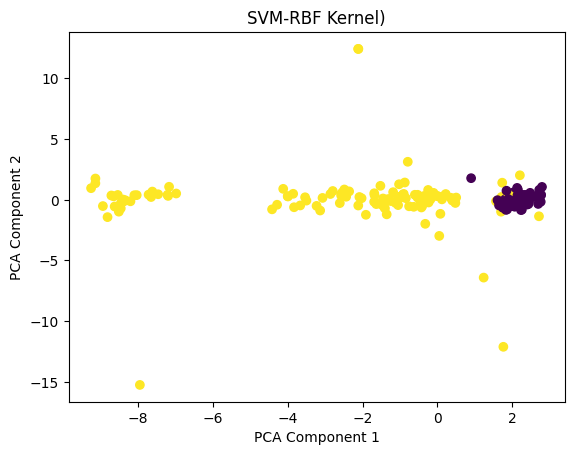

In [83]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model1.predict(X_test))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM-RBF Kernel)")

#POLYNOMIAL KERNEL SVM

In [84]:
model2=SVC(kernel='poly')

In [85]:
model2.fit(X_train,y_train)

SVC(kernel='poly')

In [86]:
model2.score(X_test,y_test)

0.8288590604026845

Text(0.5, 1.0, 'SVM-POLYNOMIAL Kernel)')

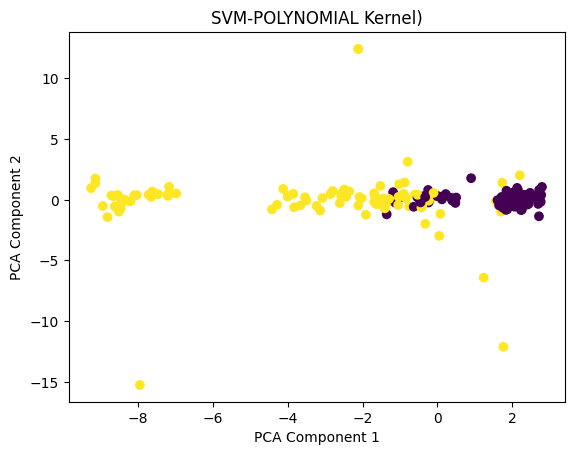

In [87]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model2.predict(X_test))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM-POLYNOMIAL Kernel)")